# Modelling PDBP Data

The purpose of this is to bring in the data, model, transform and output

In [1]:
from PDBPfunctions import *

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
   # warnings.simplefilter("default")

ModuleNotFoundError: No module named 'PDBPfunctions'

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


Set paths

In [ ]:
p_dat="/Users/michaelallwright/Documents/python/PDBP/Project Final/data/"
p_an="/Users/michaelallwright/Documents/python/PDBP/Project Final/analysis/"

In [3]:
path="/Users/michaelallwright/Dropbox (Sydney Uni)/michael_PhD/Projects/Parkinson's Longitudinal Study/Data/Processed/"
analysis="/Users/michaelallwright/Dropbox (Sydney Uni)/michael_PhD/Projects/Parkinson's Longitudinal Study/Analysis/"
covar="/Users/michaelallwright/Dropbox (Sydney Uni)/michael_PhD/Projects/Parkinson's Longitudinal Study/Data/covar Cooper/"

lkup="/Users/michaelallwright/Dropbox (Sydney Uni)/michael_PhD/Projects/Parkinson's Longitudinal Study/Data/Raw/PDBP/lookup/"


Import data

lookupdata

In [4]:
sub_CO = pd.read_excel ('%s%s' % (p_dat,"PDBP_UNSW_samples Feb 2019.xlsx"), sheet_name='Sheet1')
sub_A= pd.read_excel ('%s%s' % (p_dat,"Subject IDs 25369 Cooper RNA Group A Manifest final.2.xlsx"), sheet_name='manifest')
sub_B = pd.read_excel ('%s%s' % (p_dat,"Subject IDs 25369 Cooper RNA Group B Manifest final.2.xlsx"), sheet_name='manifest')


In [5]:
sub_A=sub_A[['Specimen Bar Code','Subject Number']]
sub_B=sub_B[['Specimen Bar Code','ST#']]
sub_B.columns=['Specimen Bar Code B','Subject Number']
sub_lkup=pd.merge(sub_A,sub_B,on='Subject Number',how='inner')


In [6]:
sub_CO=sub_CO[['Sample/Name','LIMS ID']]
sub_CO.columns=['Specimen Bar Code','sample A']
sub_CO['sample B']=sub_CO['sample A']
sub_lkup=pd.merge(sub_lkup,sub_CO[['Specimen Bar Code','sample A']],on='Specimen Bar Code',how='left')
sub_lkup=pd.merge(sub_lkup,sub_CO[['Specimen Bar Code','sample B']],left_on='Specimen Bar Code B',right_on='Specimen Bar Code',how='left')
sub_lkup[['Subject Number','sample A','sample B']].to_csv("%s%s" % (lkup,"SampleLkupDec2.csv"))

In [7]:
sub_lkup.head()

,Specimen Bar Code_x,Subject Number,Specimen Bar Code B,sample A,Specimen Bar Code_y,sample B
0,0003099546,ST-00016832,0003660550,COO6187A145,0003660550,COO6187A90
1,0003091373,ST-00016277,PD0022-3138,COO6187A147,PD0022-3138,COO6187A10
2,0003377620,ST-00017093,0003667552,COO6187A148,0003667552,COO6187A118
3,0003598555,ST-00017298,0003605662,COO6187A149,0003605662,COO6187A97
4,0003092041,ST-00016592,0003654725,COO6187A150,0003654725,COO6187A99


In [8]:
cv = pd.read_csv('%s%s' % (p_dat,"covar_correct.csv"))
df1 = pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='Screening_Demographics')
df2= pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='PD_Features')
df3 = pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='Primary_Diagnosis')
df4 = pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='Use_of_PD_Medication')
df5 = pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='General_Medical_History')
df6 = pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='Vital_Signs')


In [9]:
nih_lkup= pd.read_excel ('%s%s' % (p_dat,"NIH Sample Lookups.xlsx"),sheet_name='SampleLookup')
nih_lkup.columns=['sample','samplename','Evaluation']

In [10]:
clinical_feats=pd.merge(df1,df2,on=['REC_ID','PATNO'],how='left')
clinical_feats=pd.merge(clinical_feats,df3,on=['REC_ID','PATNO'],how='left')
clinical_feats=pd.merge(clinical_feats,cv[['PATNO','Sample name','diagnosis']],on=['PATNO'],how='inner')
clinical_feats['Age']=2013-clinical_feats['BIRTHDT']
clinical_feats=clinical_feats[['Sample name','Age']]
clinical_feats.columns=['sample','age']

Import RNA  data

In [11]:
#Official training data here
BF_data_int_t=pd.read_csv("%s%s" % (p_dat,'BF_data_int_lt.csv'))
#BF_data_int=pd.read_csv("%s%s" % (path,'BF_data_int_t.csv'))

BF_data_int_t['Gender']=BF_data_int_t['sample'].map(lambda x: str(x)[-4:-3])
BF_data_int_t['sample']=BF_data_int_t['sample'].map(lambda x: str(x)[:-5])

BF_data_int_t=pd.merge(BF_data_int_t,clinical_feats,on='sample',how='left')

#log transformed
BF_data_int_t_X=BF_data_int_t.drop(["diagnosis","sample"], axis=1)
#not log transformed
#BF_data_int_X=BF_data_int.drop(["diagnosis"], axis=1)

Validation data

In [12]:
nih_full_int_t=pd.read_csv("%s%s" % (p_dat,'nih_data_int.csv'))
nih_full_int_t_X=nih_full_int_t.drop(["sample"], axis=1)

nih_full_int_t=pd.merge(nih_full_int_t,nih_lkup,on='sample',how='left')
#nih_full_int_t

Set variables

In [13]:
BF_data_int_t_X['Gender_y']=0
BF_data_int_t_X['Gender_y'][(BF_data_int_t_X['Gender']=="M")]=1

In [14]:
BF_data_int_t.groupby('diagnosis').size()

diagnosis
HC    26
PD    28
dtype: int64

In [15]:
BF_data_int_t['age_grp']=''
BF_data_int_t['age_grp'][(BF_data_int_t['age']<65)]='<65'
BF_data_int_t['age_grp'][(BF_data_int_t['age']>=65)]='>=65'

In [16]:
#X_nolog=np.asarray(BF_data_int_X)

X_used=np.asarray(BF_data_int_t_X.drop(['age','Gender','Gender_y'],axis=1))
X_covars=np.asarray(BF_data_int_t_X[['age','Gender_y']])
y_used=np.asarray(BF_data_int_t['diagnosis'])
y_gend=np.asarray(BF_data_int_t_X['Gender'])
y_age=np.asarray(BF_data_int_t['age_grp'])


print(X_used.shape)

X_nih_used=np.asarray(nih_full_int_t_X)
X_nih_samp=np.asarray(nih_full_int_t['samplename'])
X_nih_samp_orig=np.asarray(nih_full_int_t['sample'])

print(X_nih_used.shape)
#X_nih_samp
#y_rand=y_used
#np.random.shuffle(y_rand)
#y_rand
#y=np.where(y=="PD", 1, 0)

(54, 6372)
(288, 6372)


In [17]:
import umap
reducer    = umap.UMAP(n_neighbors=20,n_components=30)
#X_Um = reducer.fit_transform(X)
#X_nih_Um = reducer.transform(X_nih)

X_Um = reducer.fit(X_used)
X_nih_Um = X_Um.transform(X_nih_used)
X_nih_Um

array([[ 0.637526  ,  3.069631  , -1.5536301 , ...,  0.27122834,
         1.2213746 ,  1.02401   ],
       [ 0.6876497 ,  2.5456107 , -1.2637786 , ...,  0.49047923,
         0.4883297 ,  0.55798143],
       [ 0.6029522 ,  2.8257225 , -1.427328  , ...,  0.377004  ,
         0.86387986,  0.8405076 ],
       ...,
       [ 0.62052083,  3.1049814 , -1.6325699 , ...,  0.4810054 ,
         1.1442584 ,  0.7898789 ],
       [ 0.4945904 ,  3.563352  , -1.6437205 , ...,  0.77796966,
         1.4631927 ,  1.2463567 ],
       [ 0.64113843,  2.6488893 , -1.5262551 , ...,  0.57973826,
         0.62754655,  0.5953447 ]], dtype=float32)

Random reassignment to check the models are legitimate

In [18]:
y_rand=y_used.copy()
np.random.shuffle(y_rand)
y_rand

array(['HC', 'HC', 'PD', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC',
       'PD', 'PD', 'PD', 'PD', 'PD', 'PD', 'HC', 'PD', 'HC', 'PD', 'HC',
       'PD', 'HC', 'HC', 'PD', 'PD', 'PD', 'HC', 'HC', 'PD', 'PD', 'PD',
       'PD', 'HC', 'HC', 'PD', 'PD', 'HC', 'HC', 'PD', 'PD', 'HC', 'PD',
       'PD', 'PD', 'PD', 'PD', 'HC', 'HC', 'PD', 'PD', 'HC', 'HC'],
      dtype=object)

Transform using standard scaler

In [19]:
scaler = StandardScaler()
sf=scaler.fit(X_used)
X_s=sf.transform(X_used)
#X_nls=sf.transform(X_nolog)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_nih_s=sf.transform(X_nih_used)

In [20]:
sf=scaler.fit(X_nih_used)
X_nih_s=sf.transform(X_nih_used)
#X_nih_s

Some models produced previously through gridsearch

In [21]:
from sklearn import linear_model
xgb_gs1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)

xgb_gs2=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)

xgb_gs3=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)


sgd=linear_model.SGDClassifier(loss='log', penalty='elasticnet', alpha=0.0001, l1_ratio=0.15)


Full set of models to call

In [22]:
names = ["AdaBoost","Bernoulli NB","Decision Tree", "Gauss Proc","Log Reg","KNN", "Naive Bayes","Neural Net","QDA","Random Forest","Linear SVM","SGD","XGBoost","XGB_gs1","XGB_gs2","XGB_gs3"]
classifiers = [ AdaBoostClassifier(),BernoulliNB(alpha=0.1),DecisionTreeClassifier(max_depth=4), GaussianProcessClassifier(), LogisticRegression(random_state=0, solver='lbfgs'),KNeighborsClassifier(7), GaussianNB(),
               
                MLPClassifier(alpha=1, max_iter=1000), QuadraticDiscriminantAnalysis(), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),sgd,
               SVC(kernel="linear", C=0.025,probability=True),xgb.XGBClassifier(random_state=1,learning_rate=0.01),xgb_gs1,xgb_gs2,xgb_gs3]    


names_sub=["BernoulliNB"]
classifiers_sub = [XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)]

classifiers_sub=[BernoulliNB(alpha=0.1)]

Run model

In [ ]:
model=BernoulliNB(alpha=0.1)

data=BF_data_int_t_X.drop(['age','Gender','Gender_y'],axis=1)
model.fit(X_s,y_used)

model.coef_[0]

check=pd.DataFrame({"var":data.columns,"coef":(model.coef_[0]).T})
check.sort_values(by='coef',ascending=False).tail(50)

,var,coef
555,CUST_2503_PI432186823,-1.710081
81,CUST_1071_PI432393034,-1.710081
377,CUST_1971_PI432186823,-1.710081
3116,ENST00000593236.1,-1.710081
5814,strDiffEx_7353,-1.710081
270,CUST_162_PI432175869,-1.710081
2499,ENST00000509730.5,-1.710081
1239,CUST_6196_PI432186823,-1.710081
1279,CUST_656_PI432186823,-1.710081
1535,CUST_9072_PI432186823,-1.710081


Create summary files for UMap and for all features 

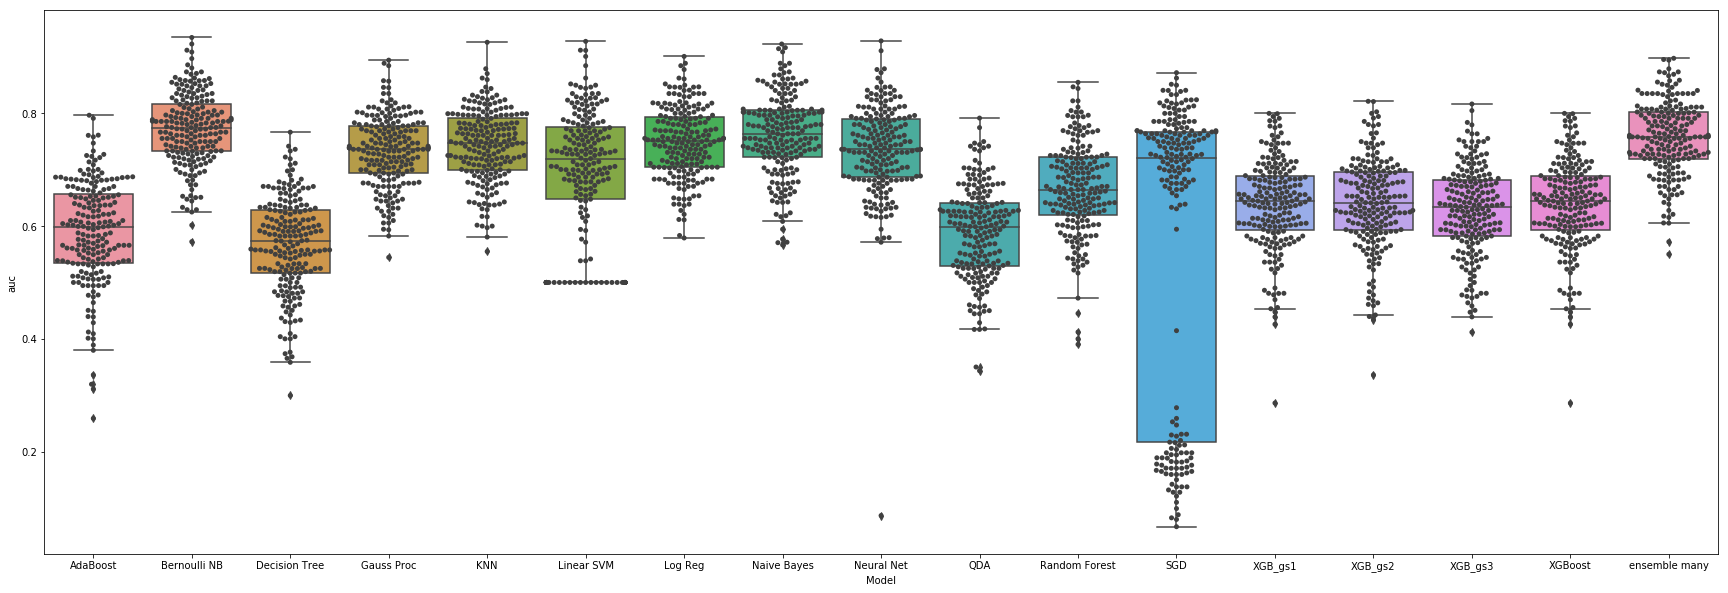

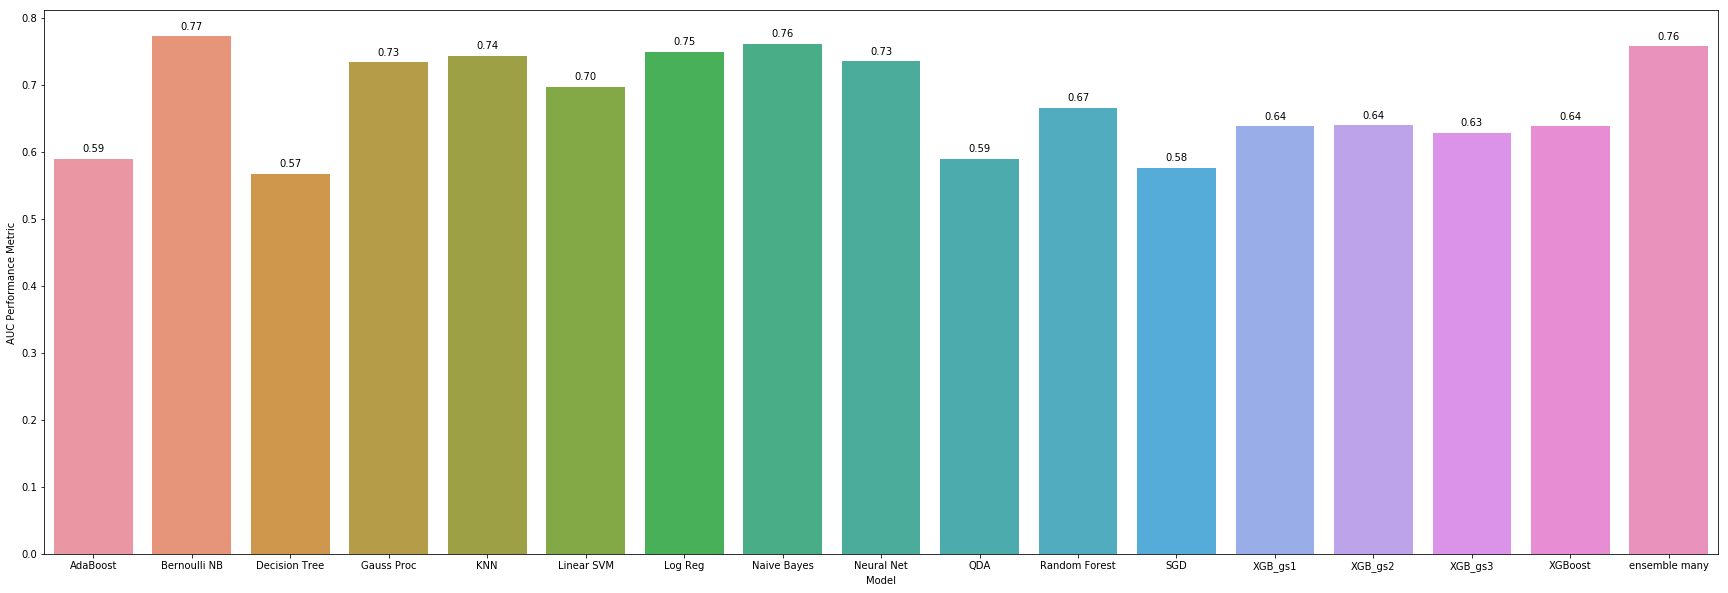

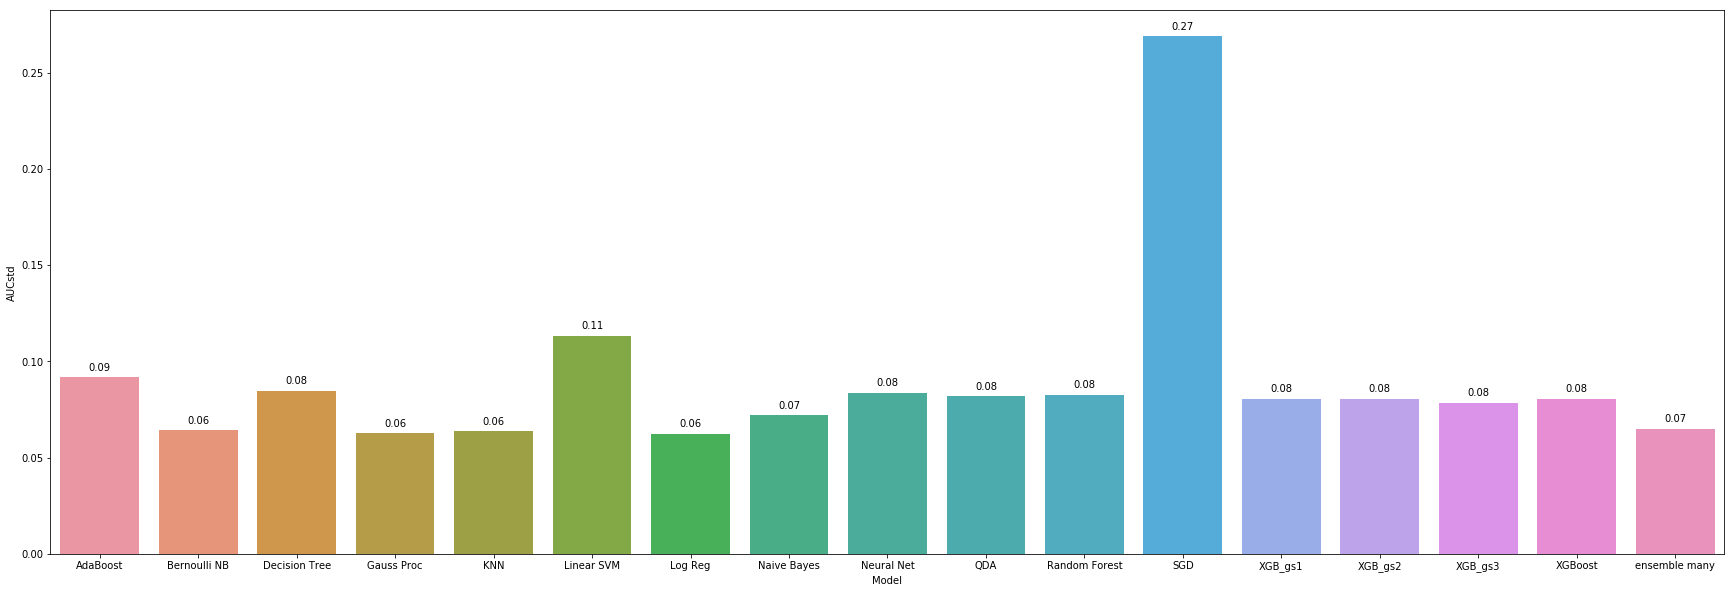

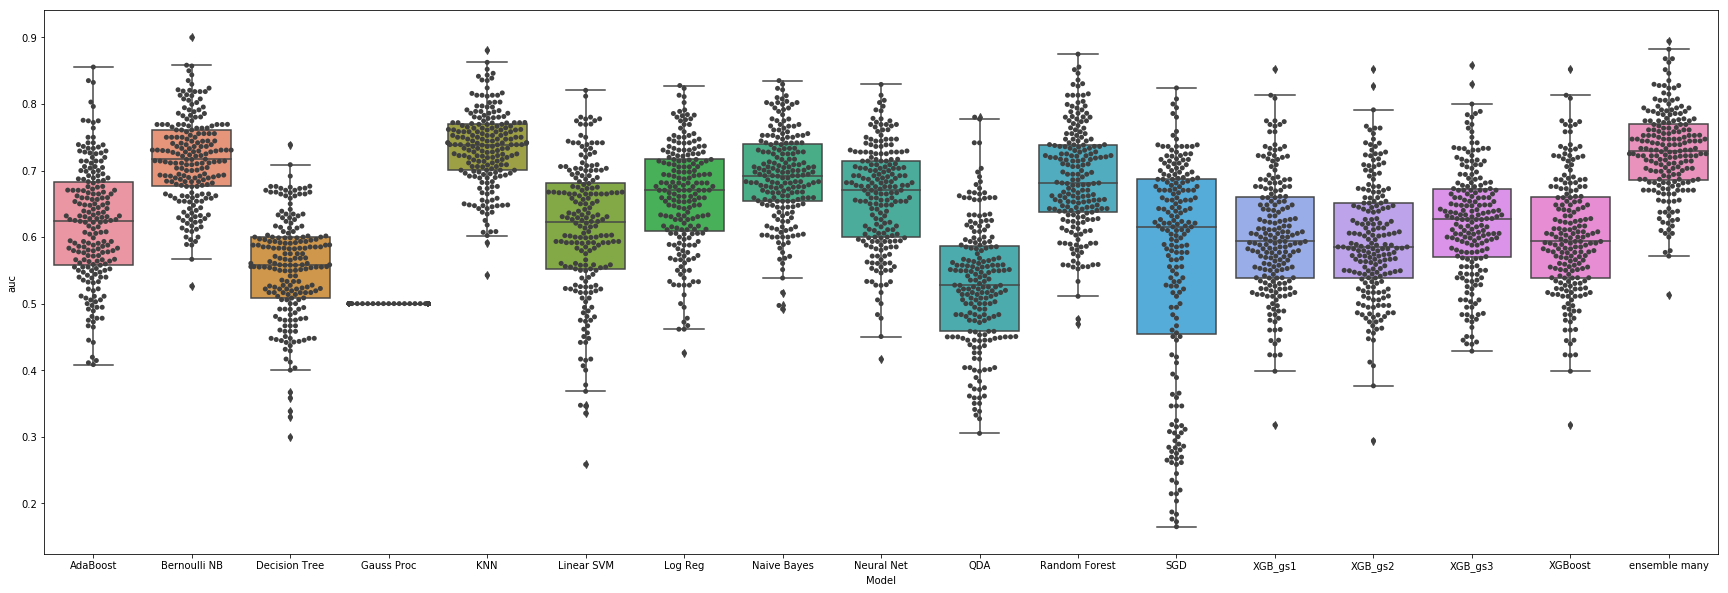

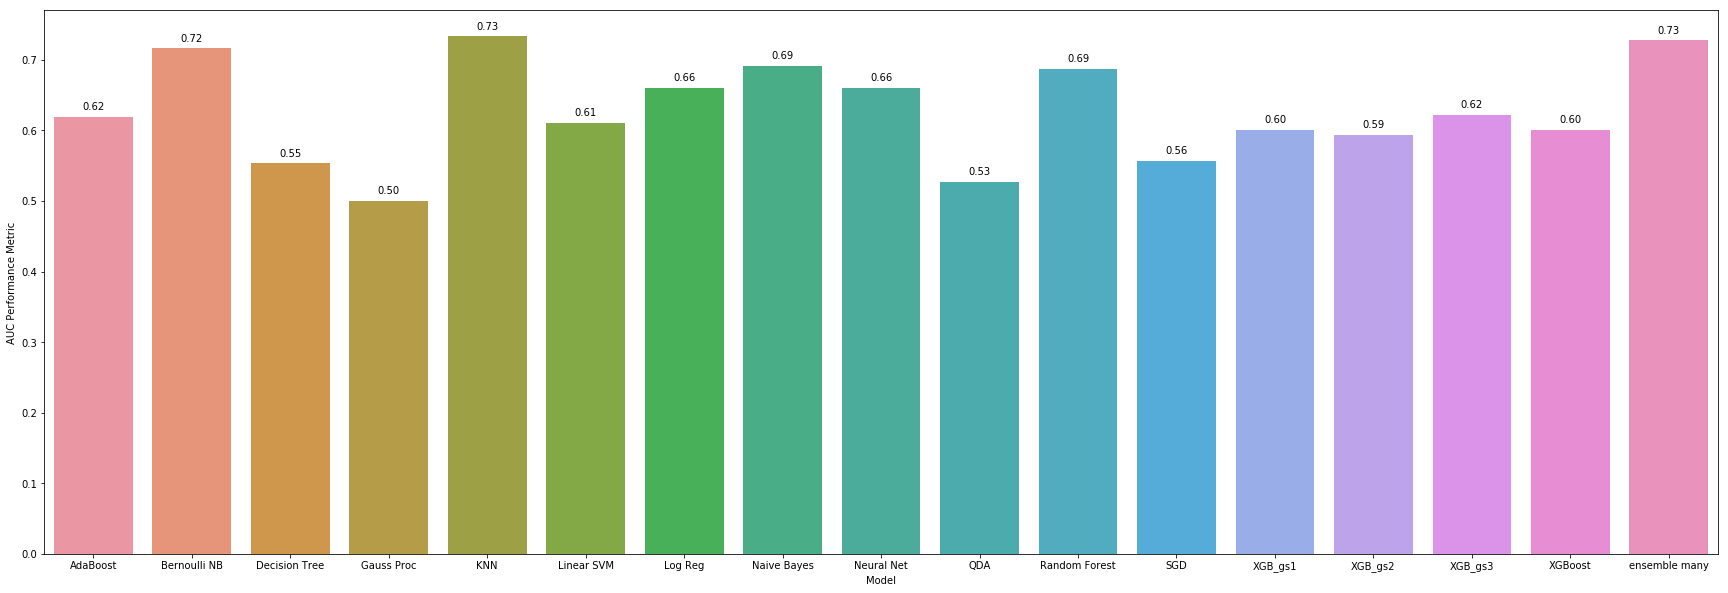

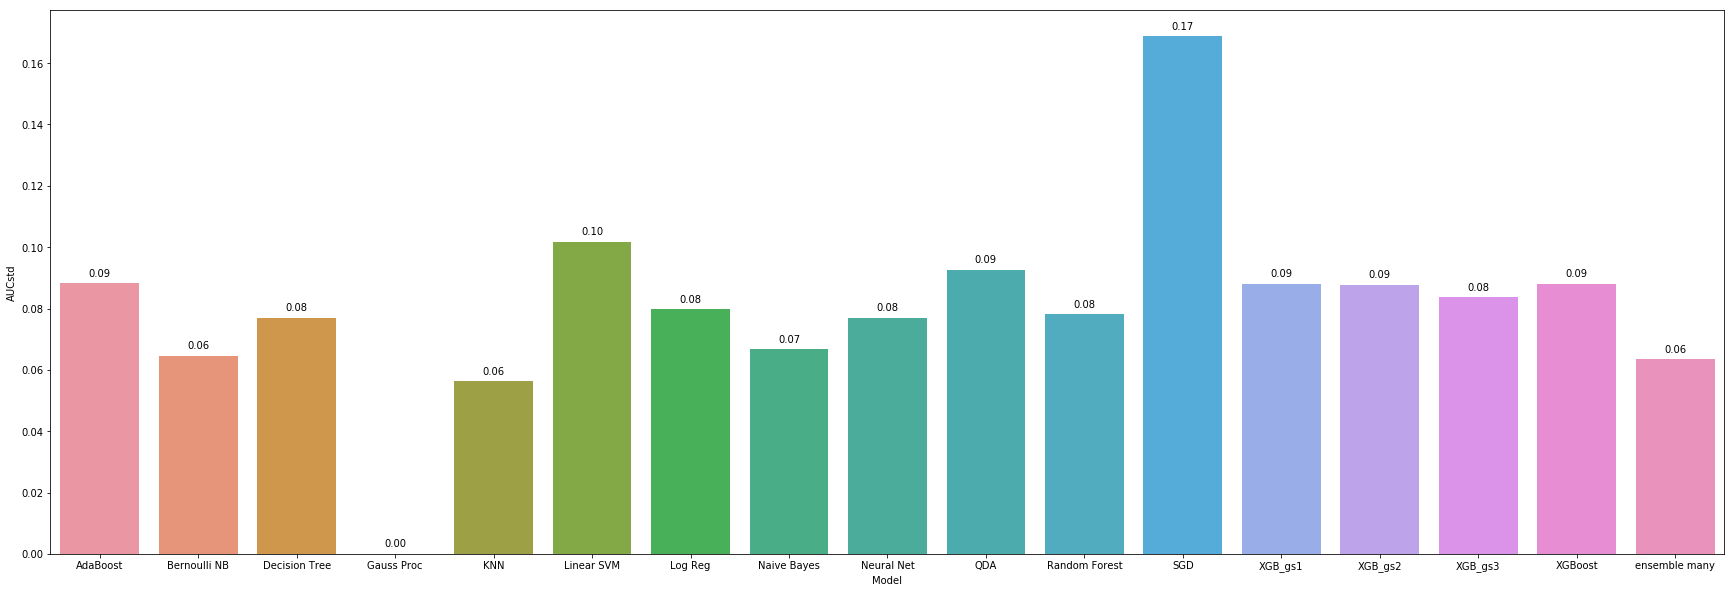

In [ ]:
testing_data_umap,mod_sum_umap=ncvmodel(X_s,y_used,"UMap",names,classifiers,analysis,y_var="PD",name="UMap Model Summary 100 reps 20191206",reps=100,umap_c=30,um_neigh=20,pca_comp=20,n_splits=2)
testing_data_all,mod_sum_all=ncvmodel(X_s,y_used,"none",names,classifiers,analysis,y_var="PD",name="All feats Model Summary 100 reps 20191206",reps=100,umap_c=30,um_neigh=20,pca_comp=20,n_splits=2)

Output predictions

In [ ]:
nih_preds_UMap=score_model(X_s,y_used,X_nih_s,names=names,classifiers=classifiers,X_nih_samp=X_nih_samp,X_nih_samp_orig=X_nih_samp_orig,
                      fs="UMap",name="NIH Predicted Outputs UMap 20191206",umap_c=30,um_neigh=20,pca_comp=20,path=analysis)
nih_preds_all=score_model(X_s,y_used,X_nih_s,names=names,classifiers=classifiers,X_nih_samp=X_nih_samp,X_nih_samp_orig=X_nih_samp_orig,
                      fs="none",name="NIH Predicted Outputs All 20191206",umap_c=30,um_neigh=20,pca_comp=20,path=analysis)

0
0
(54, 30)
4896
0
0
(54, 6372)
4896


In [ ]:
nih_preds_UMap[(nih_preds['Model']=="Naive Bayes")].sort_values(by='Sample').head(30)

Simple model run on train and test to produce ROC curves

BernoulliNB
['HC' 'HC' 'PD' 'HC' 'HC' 'PD' 'PD' 'PD' 'HC' 'PD' 'HC' 'PD' 'PD' 'PD'
 'HC' 'PD' 'HC' 'PD' 'HC' 'PD' 'HC' 'HC']
AUC: 0.72
[[8 4]
 [3 7]]


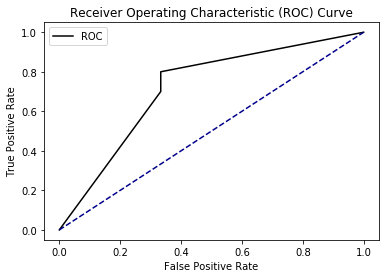

In [94]:
n_neighbors=20
n_components=30
reducer = umap.UMAP(n_neighbors=n_neighbors,n_components=n_components)
X_Um = reducer.fit_transform(X_used)
#X_Um=X_used
reps=20
names=names_sub
classifiers=classifiers_sub

from sklearn.metrics import f1_score
 
#f1_score(y_true, y_pred, average='micro')  
# f1_score(y_true, y_pred, average='weighted')  

for j in range(len(names)):
    print(names[j])
    model=classifiers[j]
    modname=names[j]
    
    X_train, X_test, y_train, y_test = train_test_split(X_s, y_used, test_size=0.4)
    model.fit(X_train,y_train)
    probs = model.predict_proba(X_test)
    pred = model.predict(X_test)
    print(pred)
    probs = probs[:, 1]
    y_vals=np.where(y_test=="PD", 1, 0)
    auc = roc_auc_score(y_vals, probs)
    print('AUC: %.2f' % auc)
    cm = confusion_matrix(y_test,pred )
    print(cm)
    fpr, tpr, thresholds = roc_curve(y_vals, probs)
    plot_roc_curve(fpr, tpr)
    pred_vals=np.where(pred=="PD", 1, 0)


AUC: 0.81
[[10  3]
 [ 2  7]]


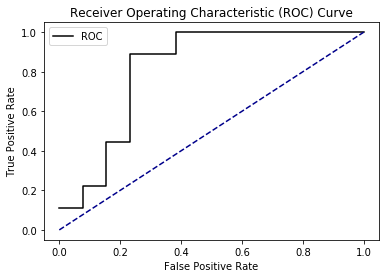

AUC: 0.77
[[5 6]
 [2 9]]


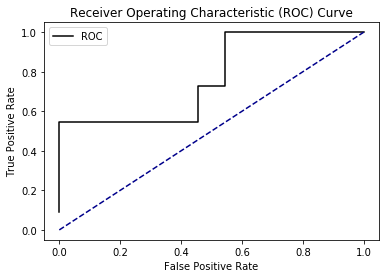

AUC: 0.73
[[7 5]
 [2 8]]


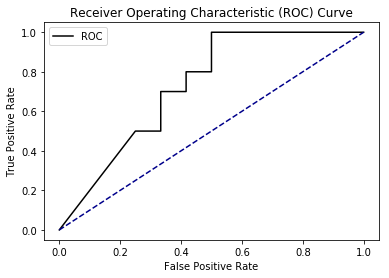

AUC: 0.81
[[8 5]
 [0 9]]


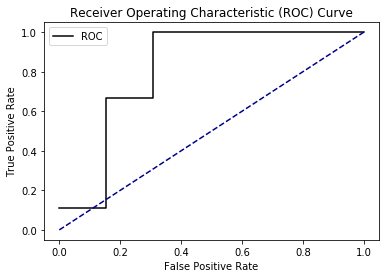

AUC: 0.91
[[12  1]
 [ 1  8]]


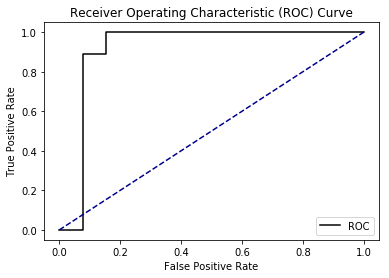

AUC: 0.82
[[11  1]
 [ 5  5]]


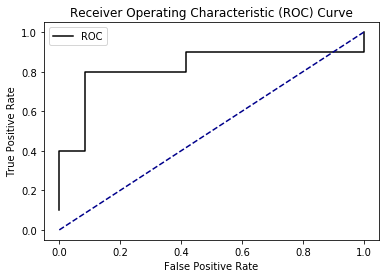

AUC: 0.72
[[ 6  4]
 [ 2 10]]


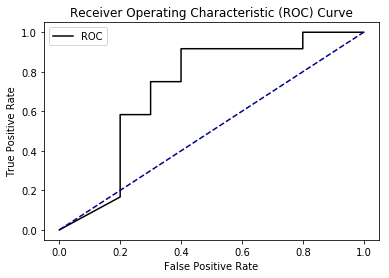

AUC: 0.67
[[8 6]
 [2 6]]


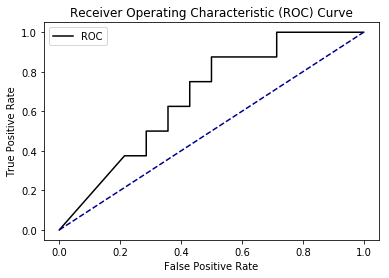

AUC: 0.88
[[ 7  4]
 [ 1 10]]


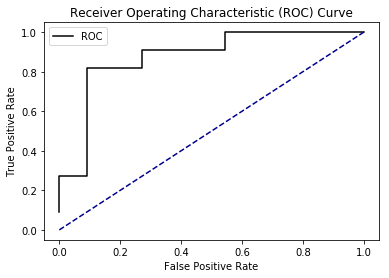

AUC: 0.87
[[8 1]
 [4 9]]


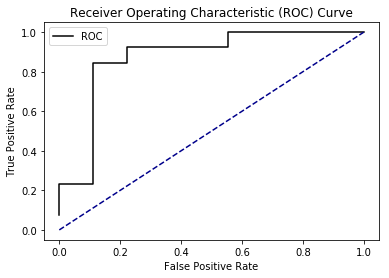

AUC: 0.83
[[ 6  3]
 [ 1 12]]


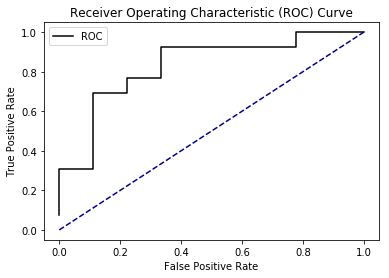

AUC: 0.85
[[9 2]
 [3 8]]


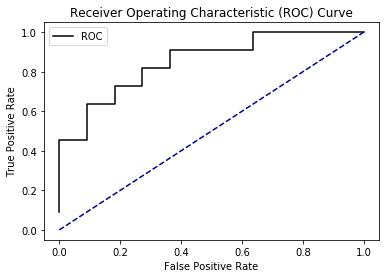

AUC: 0.83
[[ 8  1]
 [ 3 10]]


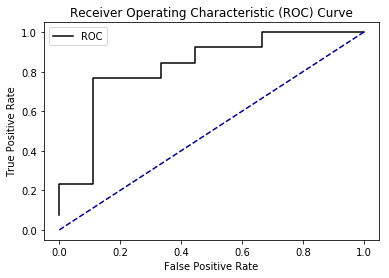

AUC: 0.77
[[7 4]
 [2 9]]


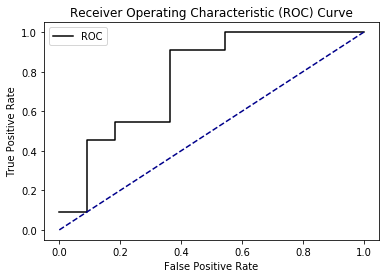

AUC: 0.76
[[8 3]
 [2 9]]


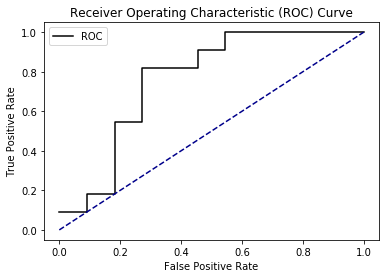

AUC: 0.79
[[10  4]
 [ 3  5]]


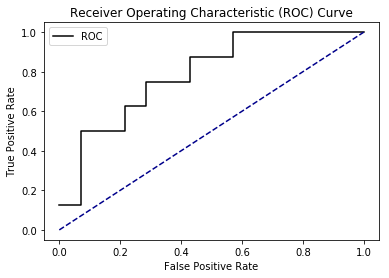

AUC: 0.90
[[ 7  1]
 [ 1 13]]


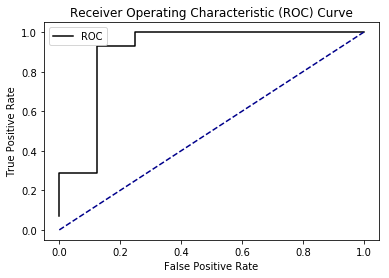

AUC: 0.79
[[7 4]
 [2 9]]


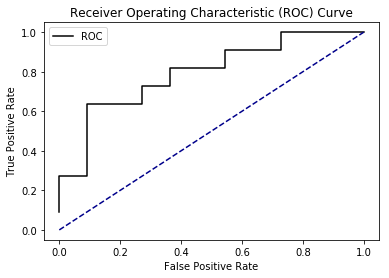

AUC: 0.85
[[ 7  2]
 [ 3 10]]


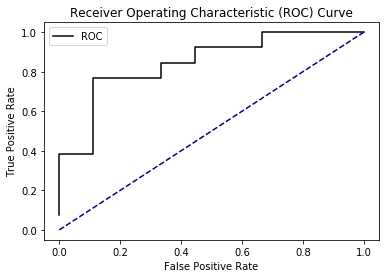

AUC: 0.76
[[6 7]
 [0 9]]


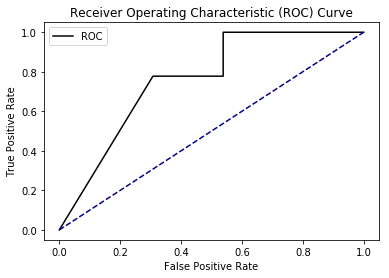

In [38]:
for i in range(reps):
        X_train, X_test, y_train, y_test = train_test_split(X_Um, y_used, test_size=0.4)

        model=GaussianNB()
        model.fit(X_train,y_train)
        #below for feature importance?
        #print(model.theta.toArray()) 
        probs = model.predict_proba(X_test)
        pred = model.predict(X_test)
        probs = probs[:, 1]
        y_vals=np.where(y_test=="PD", 1, 0)
        auc = roc_auc_score(y_vals, probs)
        print('AUC: %.2f' % auc)
        cm = confusion_matrix(y_test,pred )
        print(cm)
        fpr, tpr, thresholds = roc_curve(y_vals, probs)
        plot_roc_curve(fpr, tpr)

PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20,svd_solver='full')
X_pca20 = pca.fit_transform(X_s)
pca = PCA(n_components=10,svd_solver='full')
X_pca10 = pca.fit_transform(X_s)
pca = PCA(n_components=5,svd_solver='full')
X_pca5 = pca.fit_transform(X_s)


The following performs the necessary nested cross fold validation on BioFind samples and then prints a pdf with the key results

In [21]:

n_neighbors=20
reducer    = umap.UMAP(n_neighbors=n_neighbors,n_components=30)
X_Um = reducer.fit_transform(X_used)

X_Umag=np.append(X_Um,X_covars,axis=1)
sf=scaler.fit(X_Umag)
X_Umag=sf.transform(X_Umag)
X_Umag

array([[-1.19049584, -0.83778482, -0.13314898, ...,  0.62997834,
        -0.17691784,  1.16095912],
       [-1.54492746, -1.20166937, -0.69344487, ...,  1.37913998,
        -0.31537528,  1.16095912],
       [-1.17905785, -0.84704652,  0.00806324, ...,  0.70733375,
         1.62302891,  1.16095912],
       ...,
       [ 0.71936049, -0.03969031, -0.64025495, ..., -0.38461245,
         0.23845448,  1.16095912],
       [ 0.74553004,  0.54438501,  0.30378788, ..., -0.73069296,
        -1.56149226, -0.86135677],
       [-0.61581708, -0.81368199, -0.99349303, ...,  0.93147562,
        -1.0076625 , -0.86135677]])

Prediction script on NIH data

In [23]:

#y=np.where(y=="PD", 1, 0)



Experimental models

            Model   AUC min    AUCmax  AUC Performance Metric    AUCstd
0        AdaBoost  0.405556  0.835165                0.620949  0.089312
1    Bernoulli NB  0.536184  0.900000                0.723017  0.063962
2   Decision Tree  0.325000  0.708791                0.542395  0.073356
3      Gauss Proc  0.500000  0.500000                0.500000  0.000000
4             KNN  0.542763  0.880556                0.733602  0.056270
5      Linear SVM  0.216667  0.850000                0.613908  0.099752
6         Log Reg  0.425926  0.827778                0.660642  0.079761
7     Naive Bayes  0.491758  0.835165                0.691492  0.066718
8      Neural Net  0.261111  0.858824                0.652052  0.085431
9             QDA  0.304945  0.780220                0.527218  0.092598
10  Random Forest  0.518519  0.861111                0.688827  0.073271
11            SGD  0.164706  0.826923                0.578997  0.159543
12        XGB_gs1  0.317647  0.852273                0.601217  0

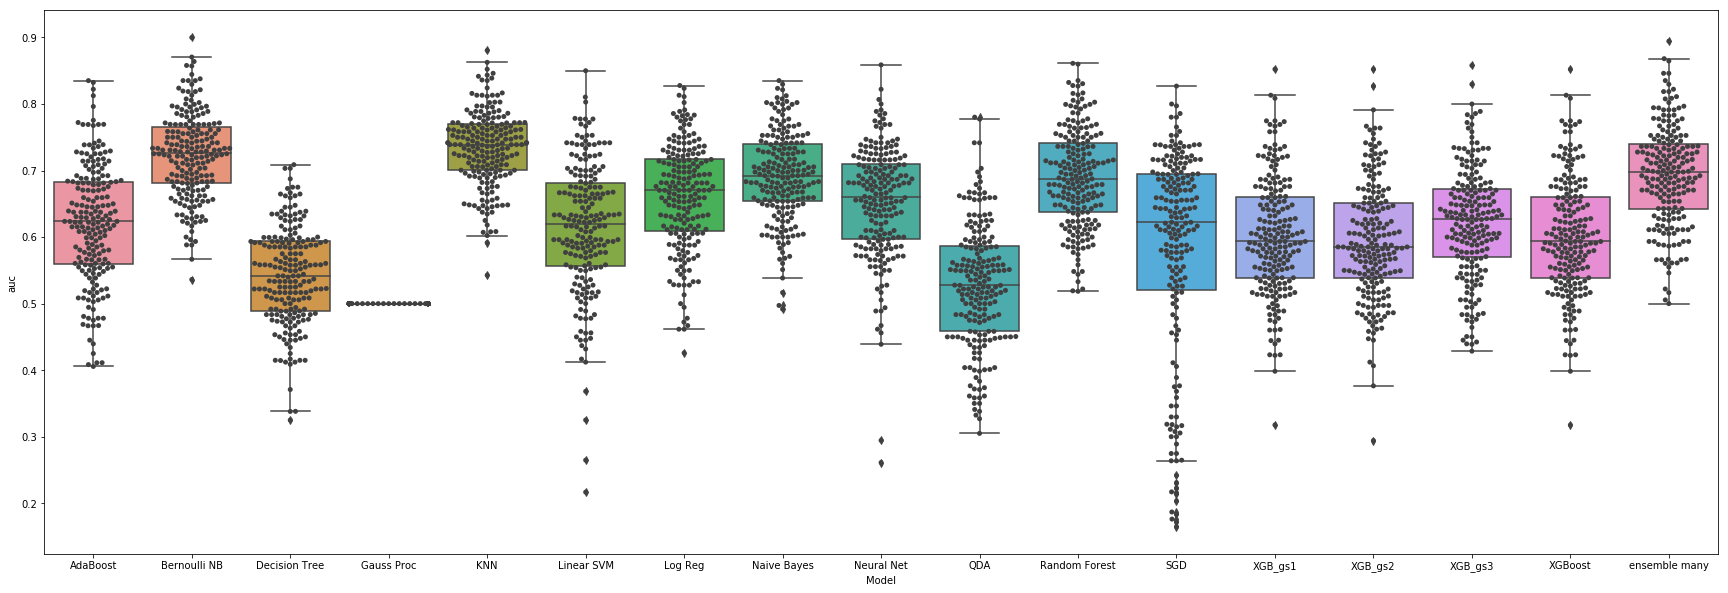

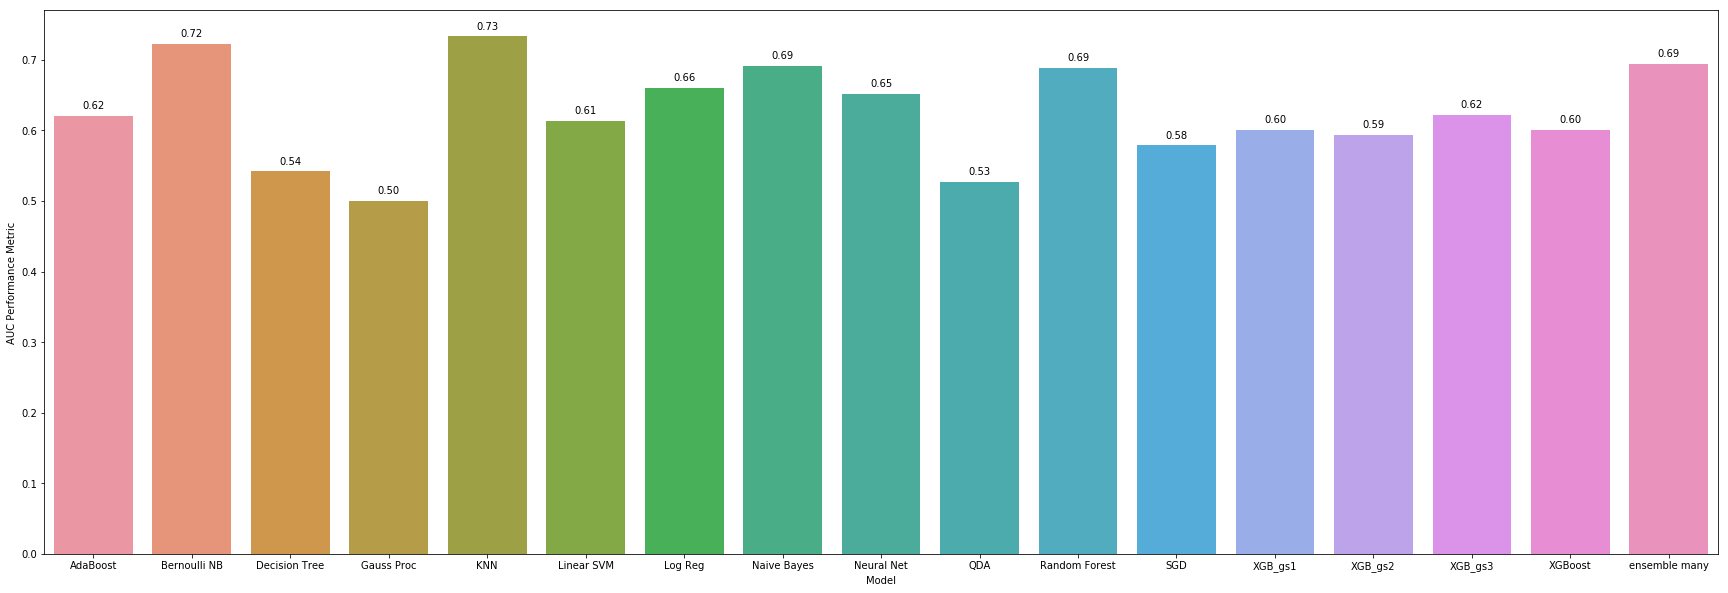

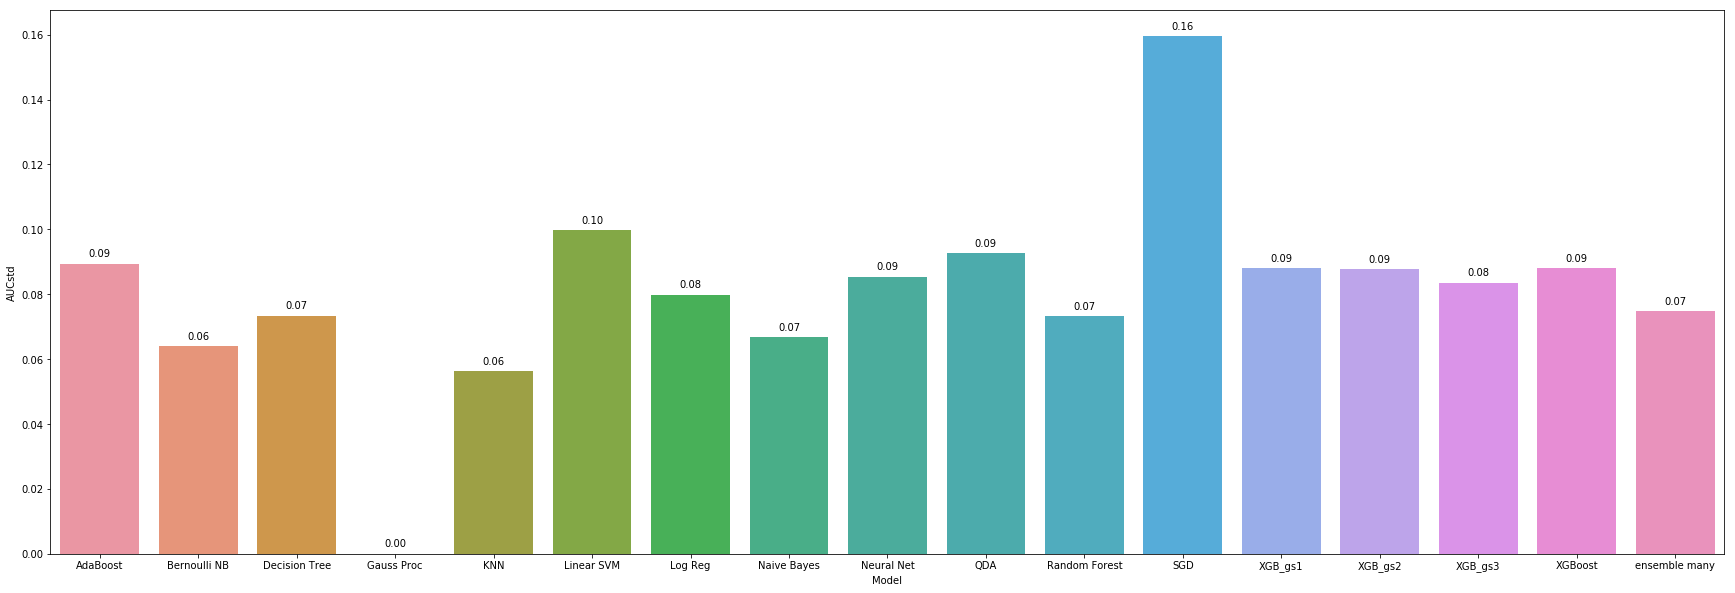

In [32]:
#testing_data_gend,mod_sum_gend=ncvmodel(X_Um,y_gend,"none",y_var='M',name="Umap Gender",umap_c=30,um_neigh=100,reps=100,n_splits=2)
#testing_data_covar,mod_sum_covar=ncvmodel(X_Umag,y_used,"none",y_var='PD',name="UMap inc age gender",umap_c=30,um_neigh=100,reps=100,n_splits=2)
#testing_data_covar,mod_sum_covar=ncvmodel(X_Umag,y_used,"none",y_var='PD',name="UMap not inc age gender",umap_c=30,um_neigh=20,reps=100,n_splits=2)
testing_data_covar,mod_sum_covar=ncvmodel(X_s,y_used,"none",y_var='PD',name="ALL FEATURES MODEL2",umap_c=30,um_neigh=20,reps=100,n_splits=2)

            Model   AUC min    AUCmax  AUC Performance Metric    AUCstd
0        AdaBoost  0.230769  0.984615                0.627781  0.113876
1    Bernoulli NB  0.338462  1.000000                0.776107  0.097239
2   Decision Tree  0.253846  0.857143                0.579479  0.097717
3      Gauss Proc  0.276923  1.000000                0.756296  0.094138
4             KNN  0.276923  0.968750                0.733321  0.094107
5      Linear SVM  0.307692  1.000000                0.705268  0.125716
6         Log Reg  0.276923  1.000000                0.767653  0.096269
7     Naive Bayes  0.276923  1.000000                0.777611  0.099010
8      Neural Net  0.276923  1.000000                0.756889  0.099897
9             QDA  0.207792  0.950000                0.587481  0.102047
10  Random Forest  0.268750  1.000000                0.682391  0.106035
11            SGD  0.012346  1.000000                0.712092  0.197335
12        XGB_gs1  0.215385  1.000000                0.669246  0

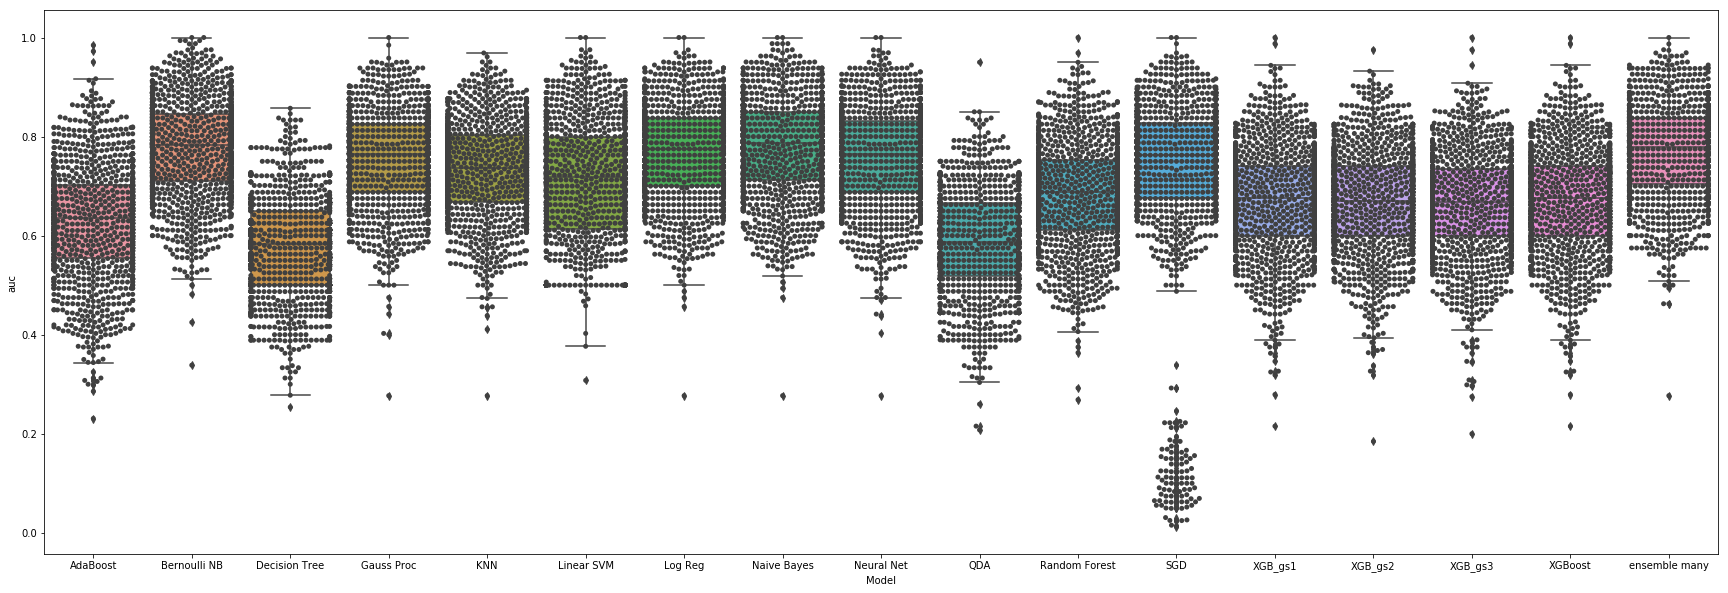

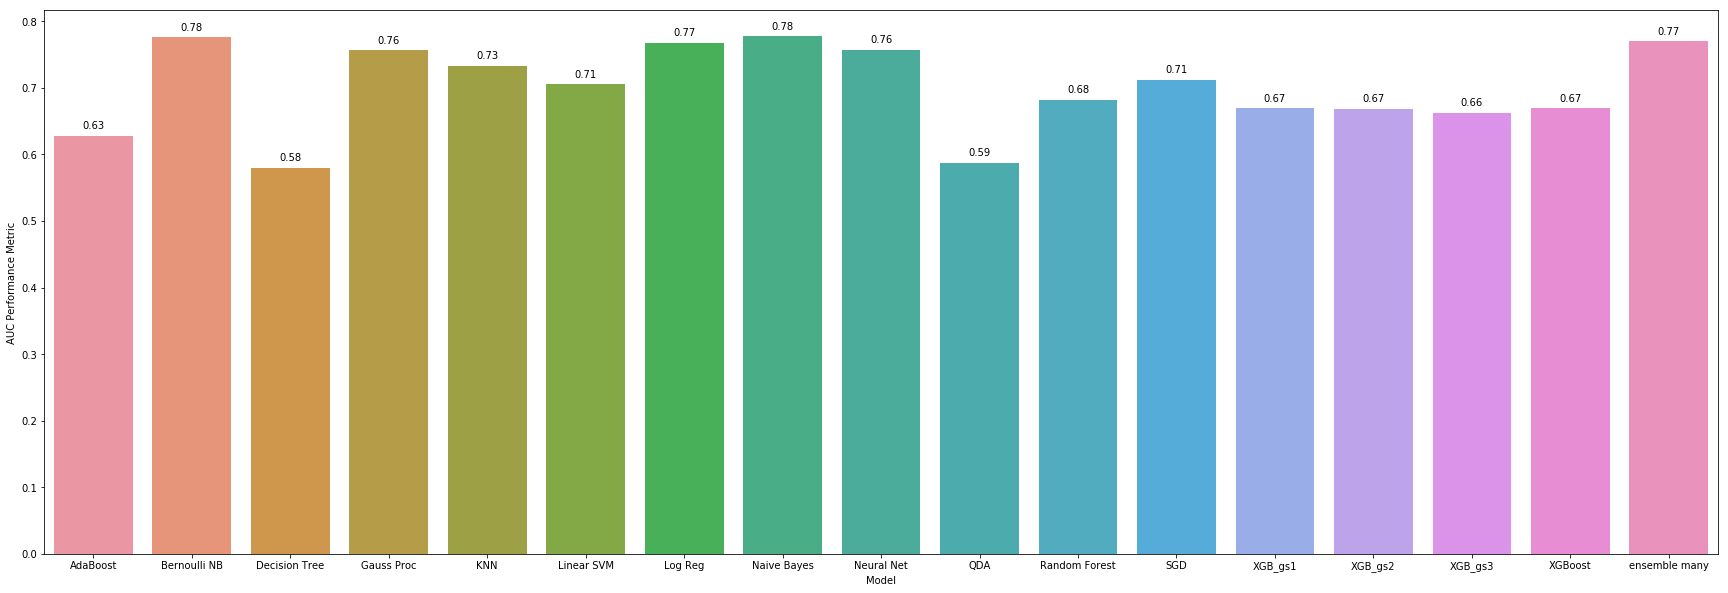

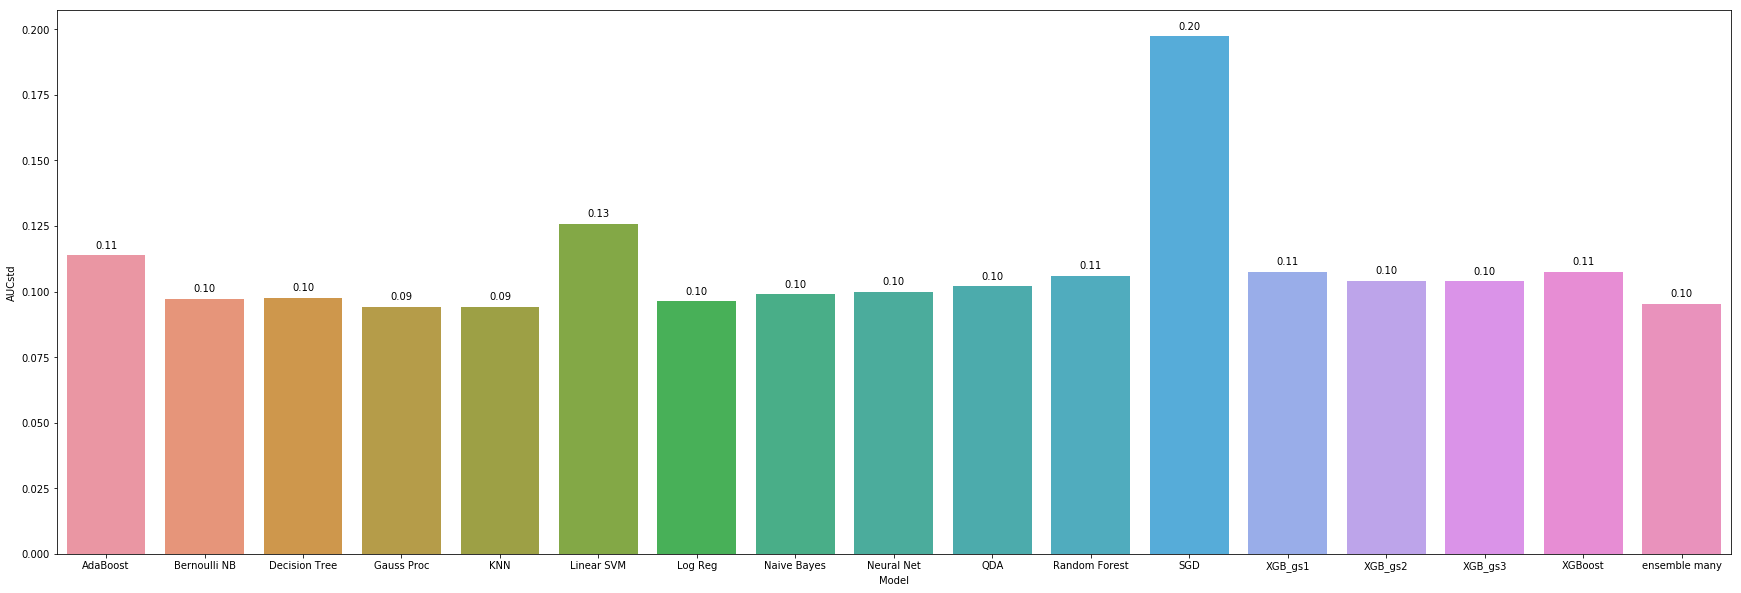

In [27]:
#testing_data_chk,mod_sum_umchk=ncvmodel(X_s,y_used,"UMap",name="UMap chksplits",umap_c=30,um_neigh=100,reps=20,n_splits=2)
#testing_data_chk,mod_sum_umchk=ncvmodel(X_s,y_used,"none",name="Allfeats chksplits",umap_c=30,um_neigh=100,reps=20,n_splits=2)
#nih_preds_chk=score_model(X_s,y_used,X_nih_s,fs="none",name="NIH Predicted Outputs Allfeats 100reps 20191119",umap_c=30,um_neigh=20,pca_comp=20)

testing_data_um400,mod_sum_um400=ncvmodel(X_s,y_used,"UMap",name="UMap 100reps2splits",umap_c=30,um_neigh=20,reps=400,n_splits=3)


#nih_preds_um=score_model(X_s,y_used,X_nih_s,fs="UMap",name="NIH Predicted Outputs UMAP 100reps 20191119",umap_c=30,um_neigh=20,pca_comp=20)


            Model   AUC min    AUCmax  AUC Performance Metric    AUCstd
0        AdaBoost  0.324176  0.900568                0.645491  0.087453
1    Bernoulli NB  0.525000  0.928571                0.762071  0.067263
2   Decision Tree  0.295455  0.900000                0.582855  0.082136
3      Gauss Proc  0.532967  0.922222                0.723761  0.064960
4             KNN  0.535714  0.911765                0.730713  0.068474
5      Linear SVM  0.035294  0.872222                0.510286  0.263228
6         Log Reg  0.521978  0.970588                0.749778  0.068991
7     Naive Bayes  0.558333  0.958824                0.770952  0.067205
8      Neural Net  0.494444  0.964706                0.736970  0.072026
9             QDA  0.266484  0.832353                0.556131  0.087468
10  Random Forest  0.408824  0.961111                0.671559  0.081090
11        XGB_gs1  0.291667  0.894444                0.665998  0.088101
12        XGB_gs2  0.351648  0.891667                0.662651  0

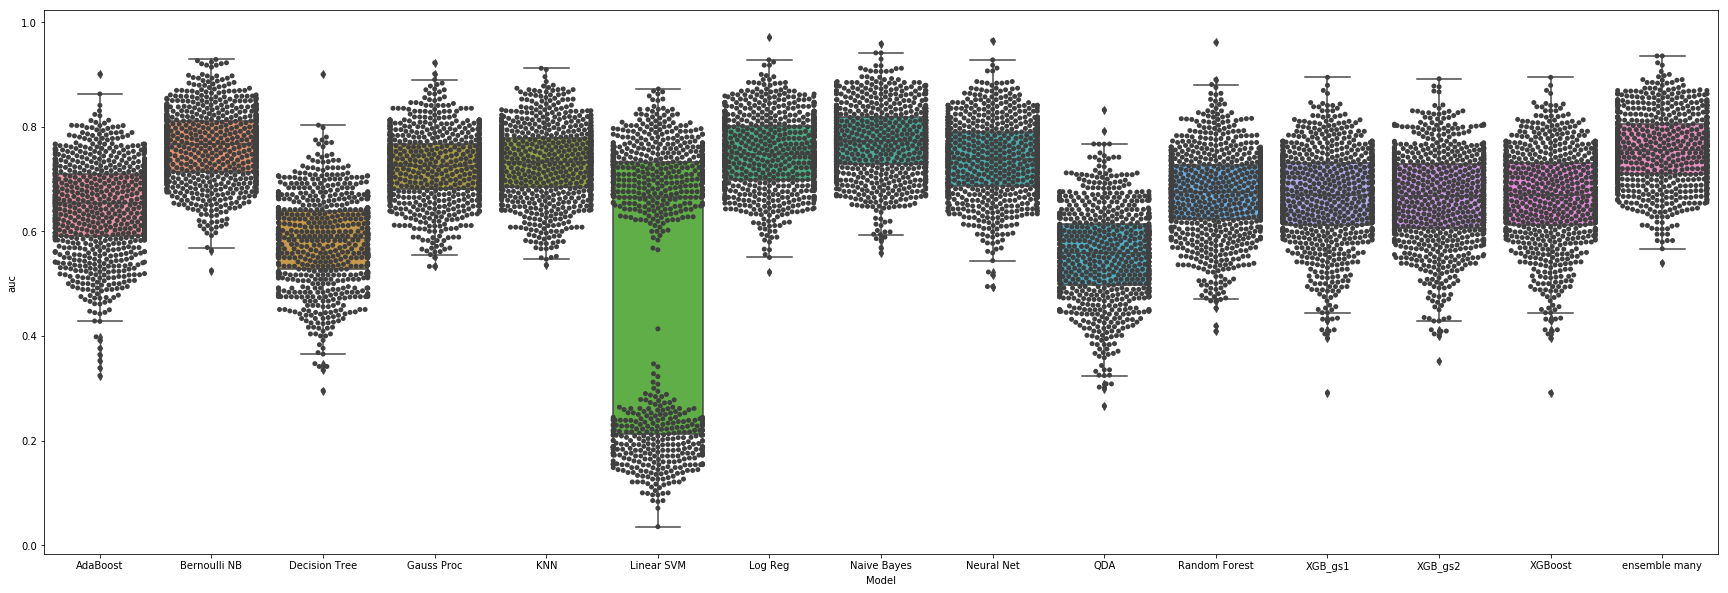

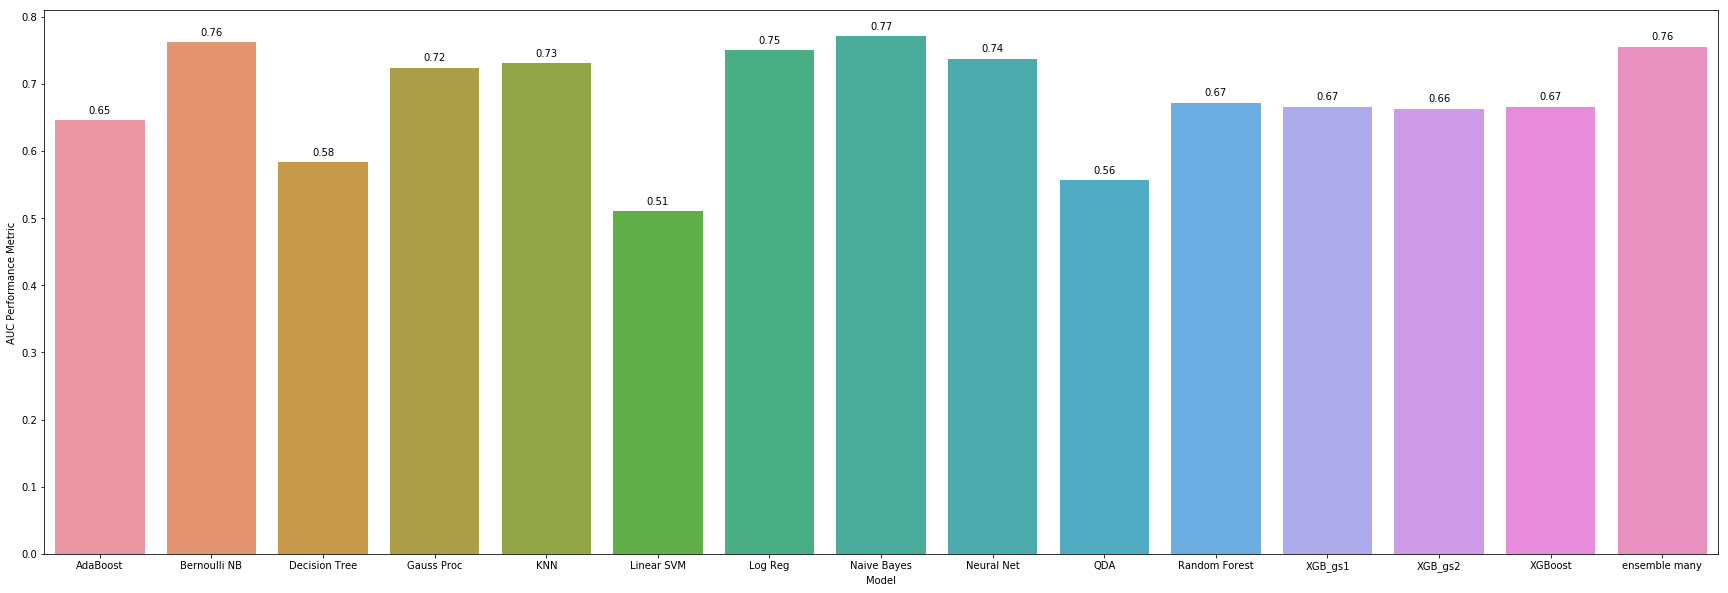

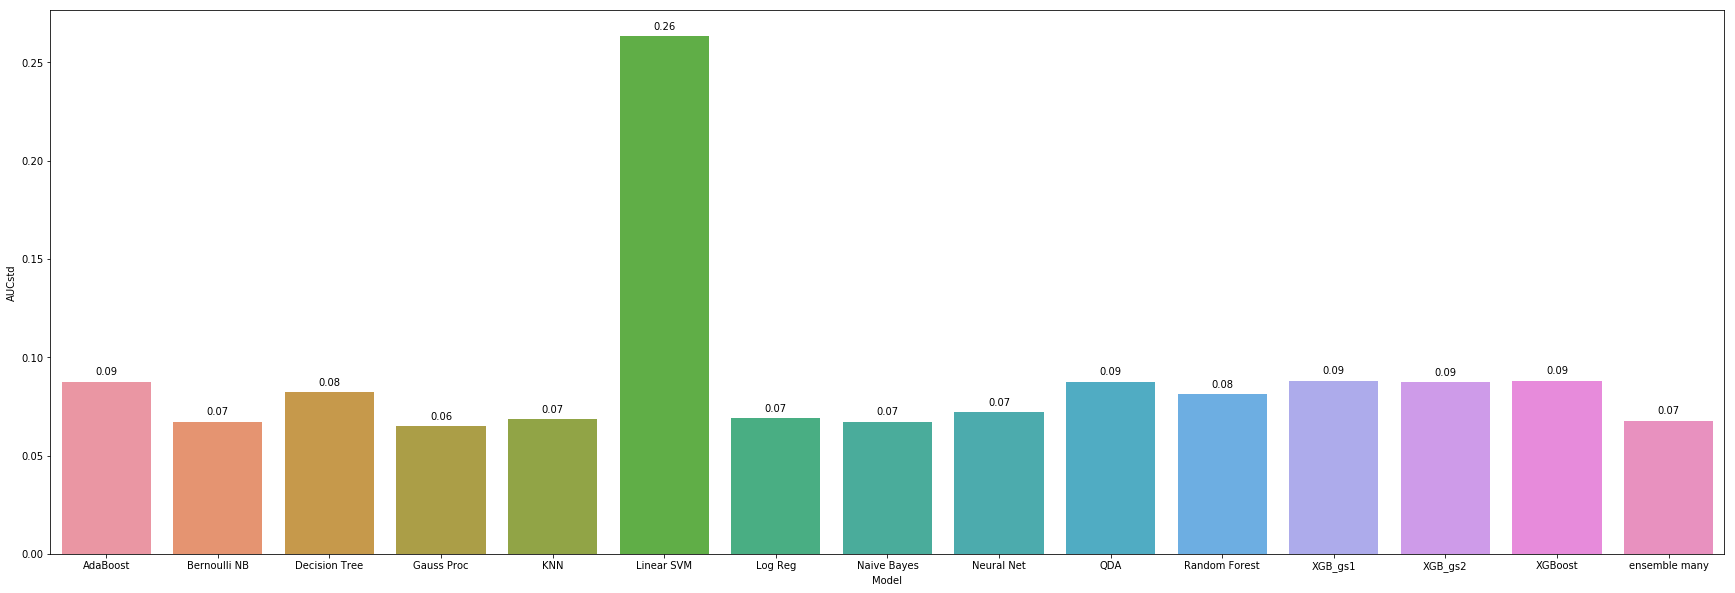

In [42]:
#ncvmodel(X_s,y_used,"UMap",name="UMap 30C 20N 100reps3splits",umap_c=30,um_neigh=20,reps=100,n_splits=3)
#nih_preds=score_model(X_s,y_used,X_nih_s,fs="UMap",name="NIH Predicted Outputs UMap 30C 20N 100reps 20191116",umap_c=30,um_neigh=20,pca_comp=20)

testing_data_um400,mod_sum_um400=ncvmodel(X_s,y_used,"UMap",name="Allfeats 400reps2splits",umap_c=30,um_neigh=20,reps=400,n_splits=2)
#nih_preds=score_model(X_s,y_used,X_nih_s,fs="none",name="NIH Predicted Outputs Allfeats 100reps 20191116",umap_c=30,um_neigh=20,pca_comp=20)

#ncvmodel(X_s,y_used,"UMap",name="UMap 30 components 20 neighbs XGB_gs_ABEns",umap_c=30,um_neigh=20,reps=10)

            Model   AUC min    AUCmax  AUC Performance Metric    AUCstd
0        AdaBoost  0.408333  0.835165                0.617766  0.088330
1    Bernoulli NB  0.536184  0.900000                0.723017  0.063962
2   Decision Tree  0.332418  0.764706                0.547334  0.076319
3      Gauss Proc  0.500000  0.500000                0.500000  0.000000
4             KNN  0.542763  0.880556                0.733602  0.056270
5      Linear SVM  0.258824  0.851648                0.610931  0.111672
6         Log Reg  0.425926  0.827778                0.660642  0.079761
7     Naive Bayes  0.491758  0.835165                0.691492  0.066718
8      Neural Net  0.379121  0.824176                0.658379  0.084790
9             QDA  0.304945  0.780220                0.527218  0.092598
10  Random Forest  0.444079  0.892857                0.690398  0.076362
11            SGD  0.164706  0.813187                0.563344  0.166435
12        XGB_gs1  0.317647  0.852273                0.601217  0

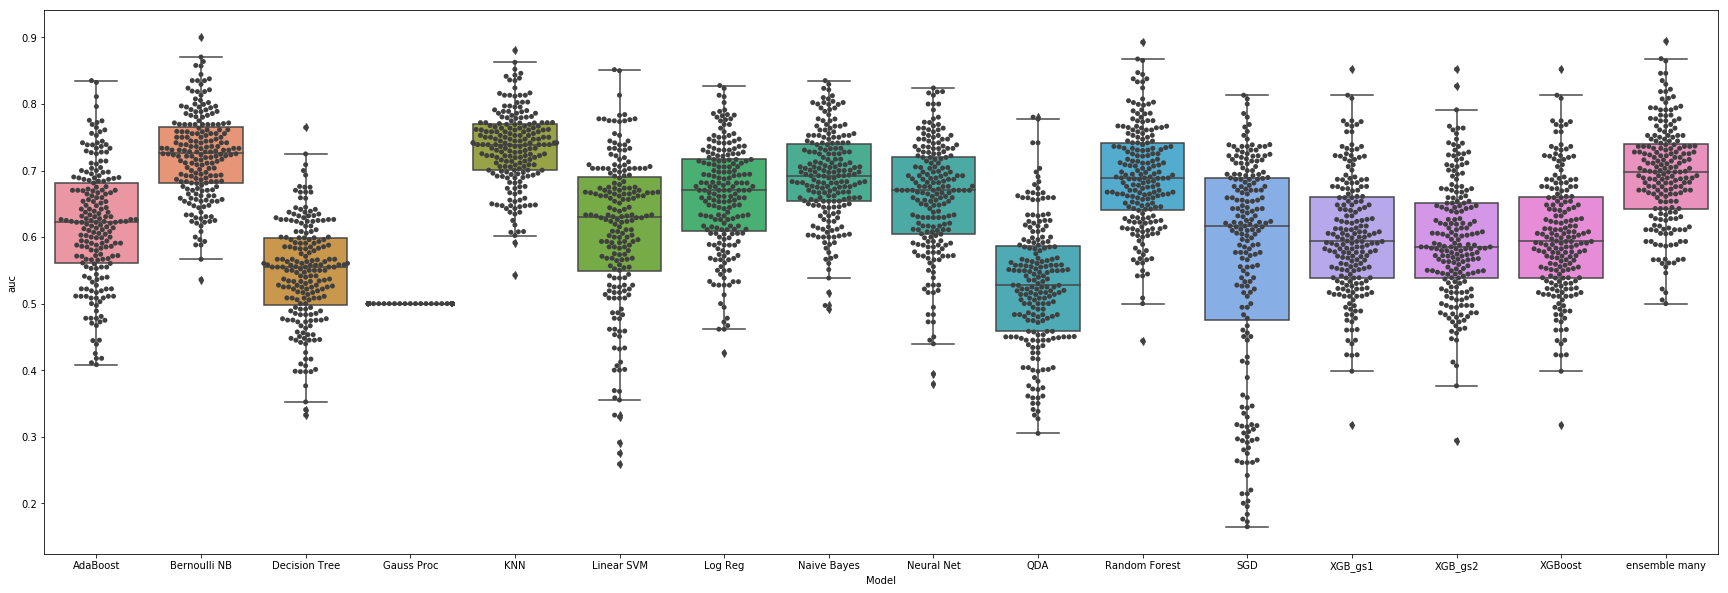

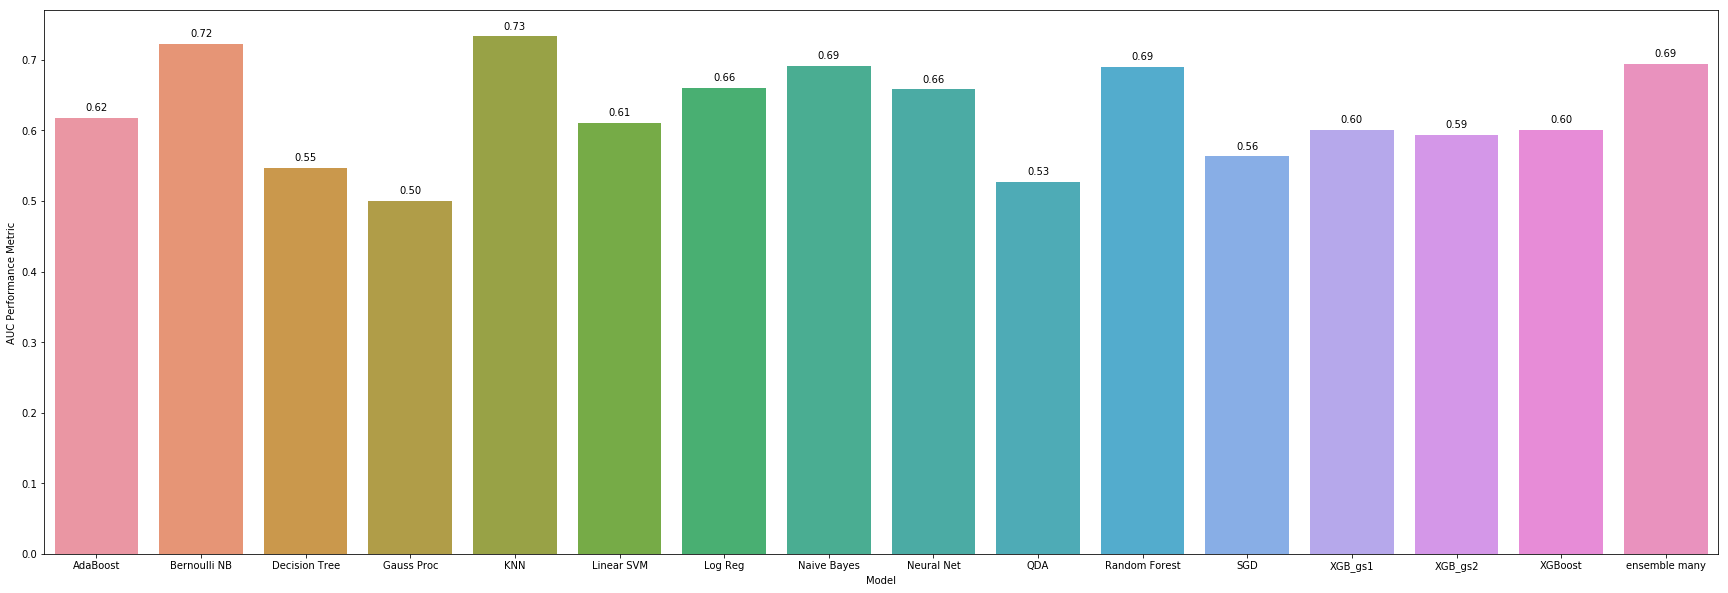

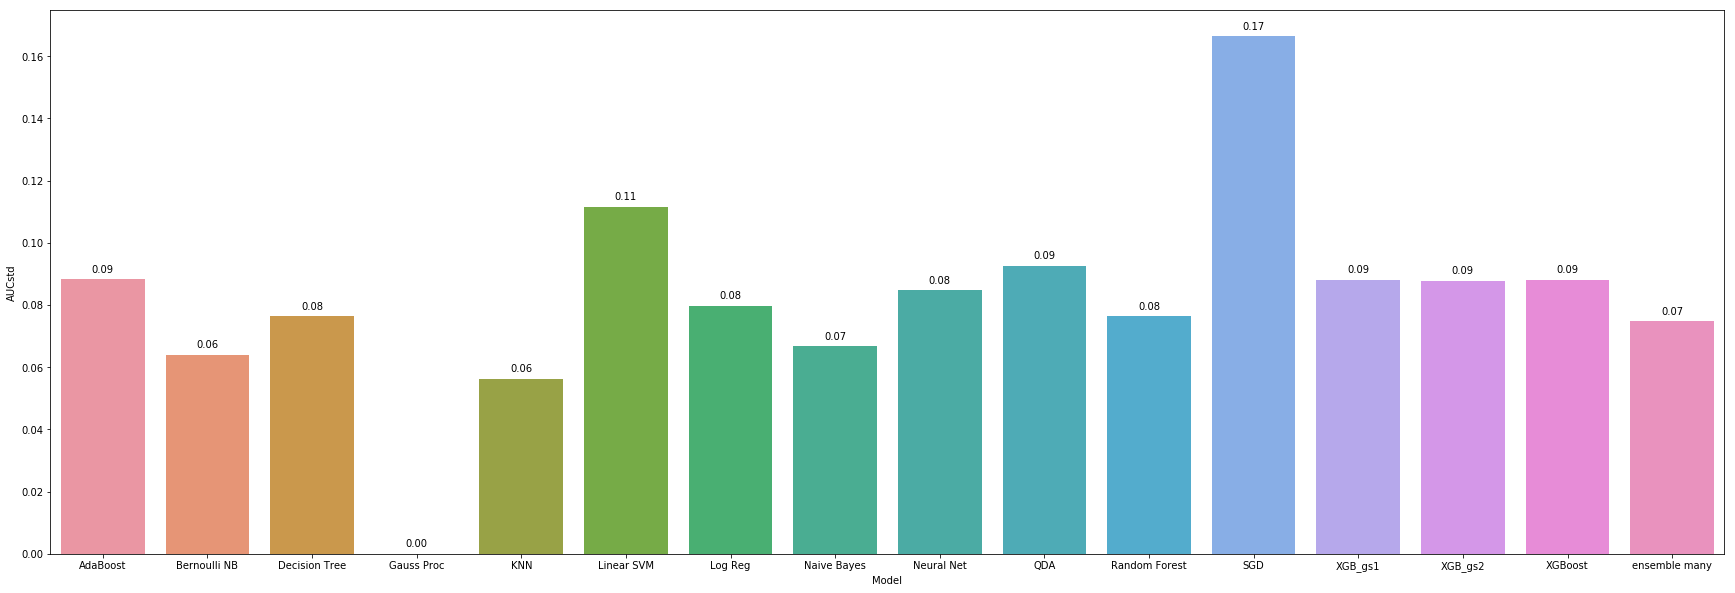

In [76]:
testing_data_none,mod_sum_none=ncvmodel(X_s,y_used,"none",name="Allfeats 100reps2splits",umap_c=30,um_neigh=20,reps=100,n_splits=2)


In [24]:
#ncvmodel(X_s,y_used,"UMap",name="UMap 100reps3splits",umap_c=30,um_neigh=20,reps=100,n_splits=2)
nih_preds=score_model(X_s,y_used,X_nih_s,fs="UMap",name="NIH Predicted Outputs UMap 20191116",umap_c=30,um_neigh=20,pca_comp=20)


0
0
(54, 30)
4896


In [39]:
test=nih_preds[(nih_preds['Model'].str.contains('KNN|Naive|Random Forest|Ensemble|Bernoulli', case=False, regex=True))]

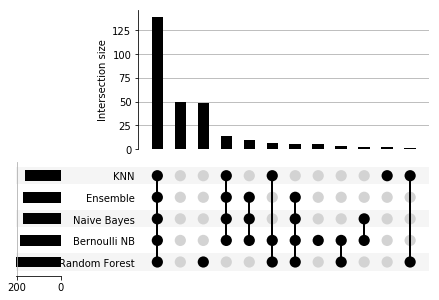

In [40]:
import upsetplot


test['PD']=0
test['PD'][(test['probs']>0.5)]=1

upset=pd.DataFrame(test.pivot(index='Sample', columns='Model', values='PD')).reset_index()
upset
#upset_series = upset.groupby("Sample").count()["PD"]
#upset_series
#upset
MODS = [c for c in upset.columns if c != "Model" and c !="Sample"]
MODS
upset_count_series = upset.groupby(MODS).count()["Sample"]
upsetplot.plot(upset_count_series, sort_by="cardinality")
plt.show()

# Model Interpretation

In [ ]:
X_s.values

In [30]:
X=BF_data_int_t_X.drop(['Gender','age'],axis=1)

In [ ]:
knn = KNeighborsClassifier()
params_search = {'n_neighbors': [3, 4, 5, 6, 7]}
grid_clf_acc = GridSearchCV(knn, params_search, cv=10, n_jobs=-1, verbose=True)
grid_clf_acc.fit(X_s, y_used)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print(grid_clf_acc.cv_results_['mean_test_score'])

reducer    = umap.UMAP(n_neighbors=20,n_components=30)
X_Um = reducer.fit_transform(X_s)
    
knn.fit(X, y_used)
# Shap
#f = lambda x: knn.predict_proba(x)[:,1]

#X_train_summary = shap.kmeans(X, 10)
#med = X_s.mean().reshape((1,X_s.shape[1]))
#explainer = shap.TreeExplainer(X_s)
#X_chk=shap.kmeans(X, 10)
explainerKNN = shap.KernelExplainer(knn.predict_proba,X)
shap_values = explainerKNN.shap_values(X)
shap.summary_plot(shap_values, X, show = False)
plt.savefig('SHAPSummary_KNN.png', bbox_inches="tight")

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


Grid best parameter (max. accuracy):  {'n_neighbors': 7}
[0.5        0.53703704 0.59259259 0.61111111 0.66666667]


A Jupyter Widget

In [ ]:
# load JS visualization code to notebook

shap.initjs()

# train XGBoost model
#X,y = shap.datasets.boston()
y_vals=np.where(y_used=="PD", 1, 0)
model = xgb.train({"learning_rate": 0.1}, xgb.DMatrix(X, label=y_vals), 100)

model=xgb_gs2
#model=KNeighborsClassifier(7)
#model=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
#model=AdaBoostClassifier()
model.fit(X, y_used)
#model = xgb_gs.train({"learning_rate": 0.01}, xgb_gs.DMatrix(X, label=y_vals), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)



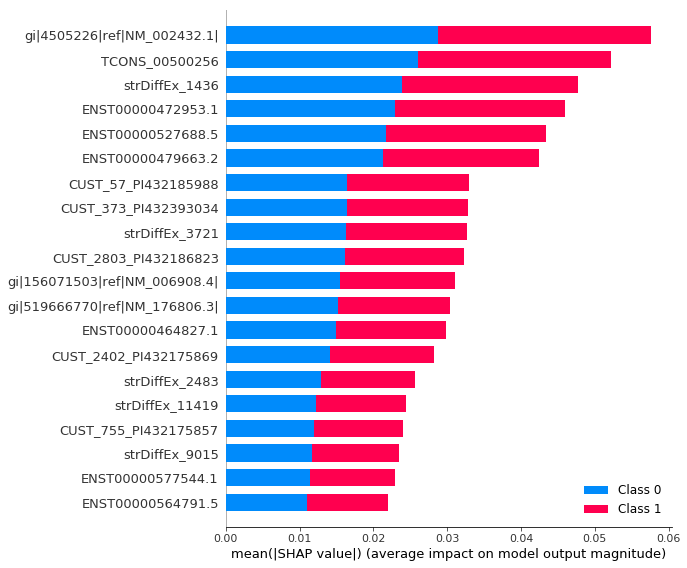

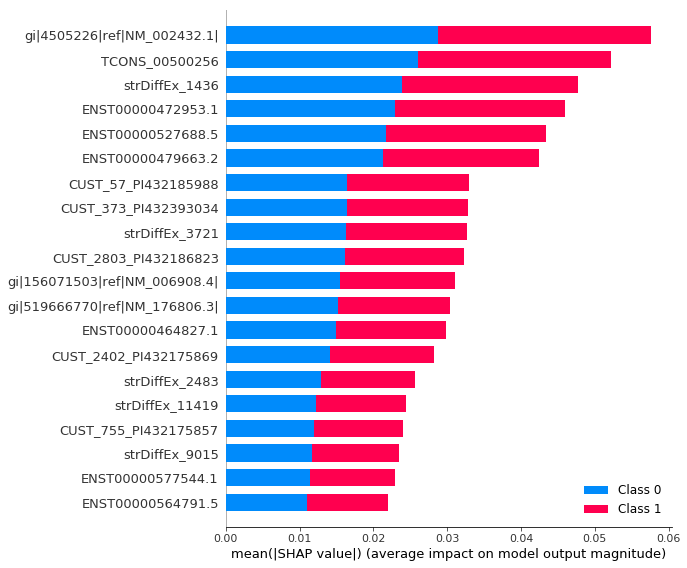

AttributeError: 'list' object has no attribute 'shape'

In [40]:
shap.summary_plot(shap_values, X)
#shap.force_plot(explainer.expected_value, shap_values[0,:], X[0,:])
shap.summary_plot(shap_values, X, plot_type="bar")
shap.dependence_plot('strDiffEx_1913', shap_values, BF_data_int_t_X)
shap.dependence_plot('gi|985482509|ref|NM_016121.4|', shap_values, BF_data_int_t_X)

PCA models

In [ ]:
ncvmodel(X_used,y_used,featsel="pca",reps=20,n_splits=5,pca_comp=20,name="PCA 20 comps 20 reps")
ncvmodel(X_used,y_used,featsel="pca",reps=20,n_splits=5,pca_comp=10,name="PCA 10 comps 20 reps")
ncvmodel(X_used,y_used,featsel="pca",reps=20,n_splits=5,pca_comp=5,name="PCA 5 comps 20 reps")
#ncvmodel(X_used,y_used,"pca",reps=10,n_splits=5,pca_comp=10,name="PCA 20 comps 10 reps")
#ncvmodel(X_used,y_used,"pca",reps=10,n_splits=5,pca_comp=10,name="PCA 20 comps 10 reps")

Grid Search on XGBoost

In [28]:
y_vals=np.where(y_used=="PD", 1, 0)
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 3,
    verbose=True
)

grid_search.fit(X_s, y_vals)
print(grid_search.best_estimator_)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 288 out of 288 | elapsed:  2.6min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)


In [ ]:
print(grid_search.best_estimator_)